In [1]:
import numpy as np
try:
    import ipywidgets as widgets
except:
    !pip install ipywidgets
    import ipywidgets as widgets
try:
    from IPython.display import display
except:
    !pip install IPython
    from IPython.display import display
try:
    from rdkit import Chem
    from rdkit.Chem import Draw, rdmolops, AllChem, DataStructs, rdCIPLabeler, rdMolAlign, rdDetermineBonds, rdFingerprintGenerator
    from rdkit.Chem.Draw import rdMolDraw2D,  IPythonConsole
except:
    !pip install rdkit # pip install --force-reinstall -v rdkit==2025.03.6
    from rdkit import Chem
    from rdkit.Chem import Draw, rdmolops, AllChem, DataStructs, rdCIPLabeler, rdMolAlign, rdDetermineBonds, rdFingerprintGenerator
    from rdkit.Chem.Draw import rdMolDraw2D,  IPythonConsole

try:
    import py3Dmol
except:
    !pip install py3Dmol
    import py3Dmol
    


In [2]:
print(f"RDKit version: {Chem.rdBase.rdkitVersion}")
assert Chem.rdBase.rdkitVersion >= '2025.03.6', "Please update your RDKit version to 2025.03.6 or later."

RDKit version: 2025.03.6


In [3]:
# What are smiles and how to write smiles
# Drawing 2D smiles

smiles_1 = 'CCC'
mol_fix = Chem.MolFromSmiles(smiles_1)
img_fix = Draw.MolToImage(mol_fix)

# Create a text input widget for the SMILES string
smiles_input = widgets.Text(description='SMILES:', width=200)

# Create a drawing area to display the molecule
mol_image = widgets.Output()

# Define a function to update the molecule drawing
def update_molecule(sender):
    smiles = smiles_input.value
    mol = Chem.MolFromSmiles(smiles)
    mol_image.clear_output(wait=True)
    with mol_image:
        if mol is not None:
            img = Draw.MolToImage(mol)
            display(img)

# Register the update function to be called whenever the input is changed
smiles_input.observe(update_molecule, 'value')

# Display the widgets
# display(img_fix)
display(smiles_input)
display(mol_image)

Text(value='', description='SMILES:')

Output()

In [4]:
# How to use rdkit molecule objects

smiles_1 = 'CCC'
mol = Chem.MolFromSmiles(smiles_1)
img = Draw.MolToImage(mol_fix)

# See attributes and methods
print(mol.__dir__())

['__module__', '__doc__', '__reduce__', '__instance_size__', '__init__', '__copy__', '__deepcopy__', 'GetNumAtoms', 'GetNumHeavyAtoms', 'GetAtomWithIdx', 'GetNumBonds', 'GetBondWithIdx', 'GetNumConformers', 'AddConformer', 'GetConformer', 'GetConformers', 'RemoveAllConformers', 'RemoveConformer', 'GetBondBetweenAtoms', 'HasQuery', 'HasSubstructMatch', 'GetSubstructMatch', 'GetSubstructMatches', 'SetProp', 'SetDoubleProp', 'SetIntProp', 'SetUnsignedProp', 'SetBoolProp', 'HasProp', 'GetProp', 'GetDoubleProp', 'GetIntProp', 'GetUnsignedProp', 'GetBoolProp', 'ClearProp', 'ClearComputedProps', 'UpdatePropertyCache', 'NeedsUpdatePropertyCache', 'ClearPropertyCache', 'GetStereoGroups', 'GetPropNames', 'GetPropsAsDict', 'GetAromaticAtoms', 'GetAtomsMatchingQuery', '__safe_for_unpickling__', '__getstate_manages_dict__', '__getinitargs__', '__getstate__', '__setstate__', 'Debug', 'ToBinary', 'GetRingInfo', 'GetAtoms', 'GetBonds', '_repr_png_', '_repr_svg_', '_repr_html_', '__GetSubstructMatch', 

In [5]:

# Iterate over atoms
for atom in mol.GetAtoms():
    print(atom)
print(atom.__dir__())

['__module__', '__doc__', '__reduce__', '__instance_size__', '__init__', '__copy__', 'GetAtomicNum', 'SetAtomicNum', 'GetSymbol', 'GetIdx', 'GetDegree', 'GetTotalDegree', 'GetTotalNumHs', 'GetNumImplicitHs', 'GetExplicitValence', 'GetImplicitValence', 'GetValence', 'GetTotalValence', 'HasValenceViolation', 'GetFormalCharge', 'SetFormalCharge', 'SetNoImplicit', 'GetNoImplicit', 'SetNumExplicitHs', 'GetNumExplicitHs', 'SetIsAromatic', 'GetIsAromatic', 'GetMass', 'SetIsotope', 'GetIsotope', 'SetNumRadicalElectrons', 'GetNumRadicalElectrons', 'GetQueryType', 'SetChiralTag', 'InvertChirality', 'GetChiralTag', 'SetHybridization', 'GetHybridization', 'HasOwningMol', 'GetOwningMol', 'GetNeighbors', 'GetBonds', 'Match', 'IsInRingSize', 'IsInRing', 'HasQuery', 'DescribeQuery', 'GetSmarts', 'SetProp', 'GetProp', 'SetIntProp', 'SetUnsignedProp', 'GetIntProp', 'GetUnsignedProp', 'SetDoubleProp', 'GetDoubleProp', 'SetBoolProp', 'GetBoolProp', 'SetExplicitBitVectProp', 'GetExplicitBitVectProp', 'HasP

In [6]:
for atom in mol.GetAtoms():
    print(atom.GetIdx(), atom.GetSymbol(), atom.GetDegree())

0 C 1
1 C 2
2 C 1


In [7]:
atom = mol.GetAtomWithIdx(1)
print(atom.GetIdx(), atom.GetSymbol(), atom.GetDegree())

1 C 2


In [8]:
for atom in mol.GetAtoms():
    print(atom.IsInRing()) # IsInRingSize(3) etc.

False
False
False


In [9]:
# Iterating over bonds 

import itertools
atom_idx = [ atom.GetIdx() for atom in mol.GetAtoms()]
for i,j in itertools.combinations(atom_idx, 2):
    print(i, mol.GetAtomWithIdx(i).GetSymbol(), j, mol.GetAtomWithIdx(j).GetSymbol())
    bond = mol.GetBondBetweenAtoms(i,j)
    print(bond.__dir__())


0 C 1 C
['__module__', '__doc__', '__reduce__', '__init__', 'HasOwningMol', 'GetOwningMol', 'GetBondType', 'SetBondType', 'GetBondTypeAsDouble', 'GetBondDir', 'SetBondDir', 'GetStereo', 'SetStereo', 'GetStereoAtoms', 'SetStereoAtoms', 'GetValenceContrib', 'GetIsAromatic', 'SetIsAromatic', 'GetIsConjugated', 'SetIsConjugated', 'GetIdx', 'GetBeginAtomIdx', 'GetEndAtomIdx', 'GetOtherAtomIdx', 'GetBeginAtom', 'GetEndAtom', 'GetOtherAtom', 'Match', 'IsInRingSize', 'IsInRing', 'HasQuery', 'DescribeQuery', 'GetSmarts', 'SetProp', 'GetProp', 'SetIntProp', 'SetUnsignedProp', 'GetIntProp', 'GetUnsignedProp', 'SetDoubleProp', 'GetDoubleProp', 'SetBoolProp', 'GetBoolProp', 'HasProp', 'ClearProp', 'GetPropNames', 'GetPropsAsDict', '__new__', '__weakref__', '__dict__', '__repr__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__reduce_ex__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__

In [10]:
atom_idx = [ atom.GetIdx() for atom in mol.GetAtoms()]
for i,j in itertools.combinations(atom_idx, 2):
    print(i, mol.GetAtomWithIdx(i).GetSymbol(), j, mol.GetAtomWithIdx(j).GetSymbol())
    bond = mol.GetBondBetweenAtoms(i,j)
    if bond :
        print("There is a bond between these atoms!")
        print(bond.GetBondType())
    else :
        print("There is no bond between these atoms!")

0 C 1 C
There is a bond between these atoms!
SINGLE
0 C 2 C
There is no bond between these atoms!
1 C 2 C
There is a bond between these atoms!
SINGLE


In [11]:
A=rdmolops.GetAdjacencyMatrix(mol)
print(A)

[[0 1 0]
 [1 0 1]
 [0 1 0]]


In [12]:
# Generating descriptors, many available in rdkit

from rdkit.Chem import Descriptors
print(len(Descriptors._descList))
print(Descriptors._descList[:10])

217
[('MaxAbsEStateIndex', <function MaxAbsEStateIndex at 0xb128ed47d00>), ('MaxEStateIndex', <function MaxEStateIndex at 0xb128ed47be0>), ('MinAbsEStateIndex', <function MinAbsEStateIndex at 0xb128ed47d90>), ('MinEStateIndex', <function MinEStateIndex at 0xb128ed47c70>), ('qed', <function qed at 0xb128ed7e9e0>), ('SPS', <function SPS at 0xb128ed7ed40>), ('MolWt', <function <lambda> at 0xb128ed7f370>), ('HeavyAtomMolWt', <function HeavyAtomMolWt at 0xb128ed7f400>), ('ExactMolWt', <function <lambda> at 0xb128ed7f490>), ('NumValenceElectrons', <function NumValenceElectrons at 0xb128ed7f520>)]


In [13]:
# Apply lipinnskyś rule of five as a filter. Bear in mind that the logP prediction is a poor model
MW = Descriptors.MolWt(mol)
HBA = Descriptors.NOCount(mol)
HBD = Descriptors.NHOHCount(mol)
LogP = Descriptors.MolLogP(mol)
conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
pass_ro5 = conditions.count(True) >= 3
print(pass_ro5)

True


Why bother generating descriptors for my molecule? Well, first of all its a quick way to access some properties.
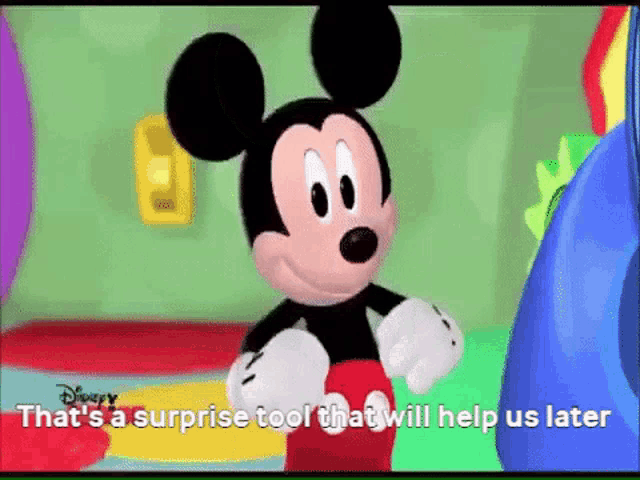

In [14]:
# This can be directly used to compute descriptors
mydescriptor = Descriptors._descList[6][1](mol)
print(mydescriptor)

44.096999999999994


In [15]:
assert Descriptors.MolWt(mol) == mydescriptor

In [16]:
def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule
    
        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for nm,fn in Descriptors._descList:
        # some of the descriptor fucntions can throw errors if they fail, catch those here:
        try:
            val = fn(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[nm] = val
    return res

mydescriptors = getMolDescriptors(mol)
print(mydescriptors)

{'MaxAbsEStateIndex': np.float64(2.125), 'MaxEStateIndex': np.float64(2.125), 'MinAbsEStateIndex': np.float64(1.25), 'MinEStateIndex': np.float64(1.25), 'qed': 0.3854706587740357, 'SPS': 6.0, 'MolWt': 44.096999999999994, 'HeavyAtomMolWt': 36.033, 'ExactMolWt': 44.062600255999996, 'NumValenceElectrons': 20, 'NumRadicalElectrons': 0, 'MaxPartialCharge': -0.059038363929048716, 'MinPartialCharge': -0.06564544121023959, 'MaxAbsPartialCharge': 0.06564544121023959, 'MinAbsPartialCharge': 0.059038363929048716, 'FpDensityMorgan1': 1.3333333333333333, 'FpDensityMorgan2': 1.3333333333333333, 'FpDensityMorgan3': 1.3333333333333333, 'BCUT2D_MWHI': 13.425713650761436, 'BCUT2D_MWLOW': 10.597286349238559, 'BCUT2D_CHGHI': 1.3523744386698806, 'BCUT2D_CHGLO': -1.4760582438091703, 'BCUT2D_LOGPHI': 1.5588136507614399, 'BCUT2D_LOGPLOW': -1.26961365076144, 'BCUT2D_MRHI': 3.9177136507614367, 'BCUT2D_MRLOW': 1.0892863492385598, 'AvgIpc': 0.9182958340544894, 'BalabanJ': np.float64(1.6329931618554523), 'BertzCT'

In [17]:
# Another type of descriptors: circular/Morgan fingerprints

# We can use a generator to generate fingerprints for multiple molecules
fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2)
my_fingerprint = fpgen.GetFingerprint(mol)
print(np.array(my_fingerprint))

# Essentially an array of graph items

[0 0 0 ... 0 0 0]


In [18]:
# Another type of descriptors: topological fingerprints

fpgen = rdFingerprintGenerator.GetRDKitFPGenerator() # maxPath=2,fpSize=1024
my_fingerprint = fpgen.GetFingerprint(mol)
print(np.array(my_fingerprint))

# Essentially an array of graph items

[0 0 0 ... 0 0 0]


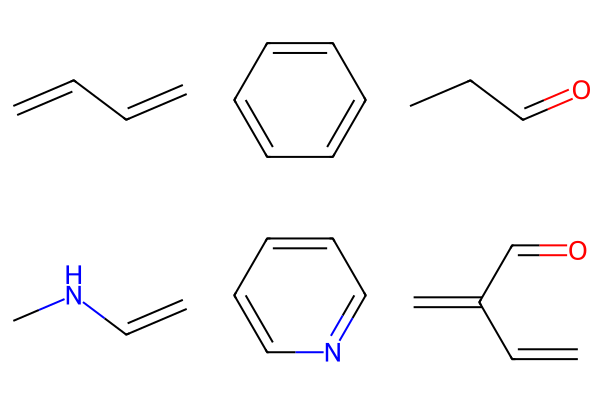

In [19]:
# Lets start working with a bunch of molecules
mol_smiles = [ "C=CC=C", "c1ccccc1", "C(C=O)C", "CNC=C", "c1ncccc1", "C=C(C=O)C=C"]
mols = [ Chem.MolFromSmiles(smiles) for smiles in mol_smiles ]
Draw.MolsToGridImage(mols)

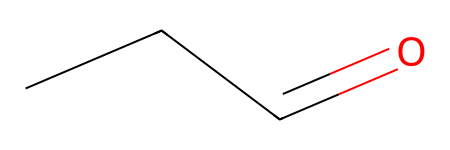

In [20]:
# Keep in mind that fingerprints are very compact and can be used to run similarity search in a very fast way
# What is the most similar molecule to our old trusty mol defined above?

fps = [fpgen.GetFingerprint(x) for x in mols]
similarities = [ DataStructs.TanimotoSimilarity(fp,my_fingerprint) for fp in fps ]
display(mols[np.argmax(similarities)])

In [21]:
# Substructure searches

patt = Chem.MolFromSmarts('C=O')
mol.HasSubstructMatch(patt)
for x in mols:
    print(x.HasSubstructMatch(patt))
    if x.HasSubstructMatch(patt):
        print(x.GetSubstructMatch(patt)) # Get the idx of the atoms that match pattern in x

False
False
True
(1, 2)
False
False
True
(2, 3)


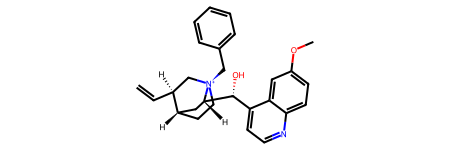

In [22]:
# Substructure manipulation, let us look at a more funky molecule

mol_smiles = 'C=C[C@H]1C[N@+]2(Cc3ccccc3)CC[C@H]1C[C@H]2[C@H](O)c1ccnc2ccc(OC)cc12'
mol = Chem.MolFromSmiles(mol_smiles)
display(mol)

In [23]:
r1 = ['Cc1ccccc1', 'Cc2c1ccccc1cc3ccccc23', 'Cc1cc(C(C)(C)C)cc(C(C)(C)C)c1', 'Cc1ccc(C(F)(F)F)cc1', 'Cc1ccccn1', 'Cc1ccccc1(C#N)']
r1_names = ['ph', 'ar', 'tbu', 'cf3', 'py', 'cn']

r2 = ['[C@H](O)', '[C@@H](NC(=S)Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)', '[C@@H](Nc1c(Nc2cc(C(F)(F)F)cc(C(F)(F)F)c2)c(=O)c1=O)']
r2_names = ['oh', 'thi', 'sqa']


In [24]:
# Lets do this the evil way, which sometimes is the simplest...
cat_list = []
names_list = []
for i in r1:
    for j in r2:
        cat_list.append('C=C[C@H]4C[N@+]5('+i+')CC[C@H]4C[C@H]5'+j+'c6ccnc7ccc(OC)cc67')      
for i in r1_names:
    for j in r2_names:
        names_list.append('cat_' + i + '_' + j)
        
#  These smiles codes might not be optimal, but they will be converted again below/
cat_list
print(names_list)

['cat_ph_oh', 'cat_ph_thi', 'cat_ph_sqa', 'cat_ar_oh', 'cat_ar_thi', 'cat_ar_sqa', 'cat_tbu_oh', 'cat_tbu_thi', 'cat_tbu_sqa', 'cat_cf3_oh', 'cat_cf3_thi', 'cat_cf3_sqa', 'cat_py_oh', 'cat_py_thi', 'cat_py_sqa', 'cat_cn_oh', 'cat_cn_thi', 'cat_cn_sqa']


C=C[C@H]1C[N@+]2(Cc3ccccc3)CC[C@H]1C[C@H]2[C@H](O)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3ccccc3)CC[C@H]1C[C@H]2[C@@H](NC(=S)Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3ccccc3)CC[C@H]1C[C@H]2[C@@H](Nc1c(Nc2cc(C(F)(F)F)cc(C(F)(F)F)c2)c(=O)c1=O)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3c4ccccc4cc4ccccc34)CC[C@H]1C[C@H]2[C@H](O)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3c4ccccc4cc4ccccc34)CC[C@H]1C[C@H]2[C@@H](NC(=S)Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3c4ccccc4cc4ccccc34)CC[C@H]1C[C@H]2[C@@H](Nc1c(Nc2cc(C(F)(F)F)cc(C(F)(F)F)c2)c(=O)c1=O)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3cc(C(C)(C)C)cc(C(C)(C)C)c3)CC[C@H]1C[C@H]2[C@H](O)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3cc(C(C)(C)C)cc(C(C)(C)C)c3)CC[C@H]1C[C@H]2[C@@H](NC(=S)Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3cc(C(C)(C)C)cc(C(C)(C)C)c3)CC[C@H]1C[C@H]2[C@@H](Nc1c(Nc2cc(C(F)(F)F)cc(C(F)(F)F)c2)c(=O)c1=O)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3ccc(C(F)(F)F)cc3)CC[C@H]1C

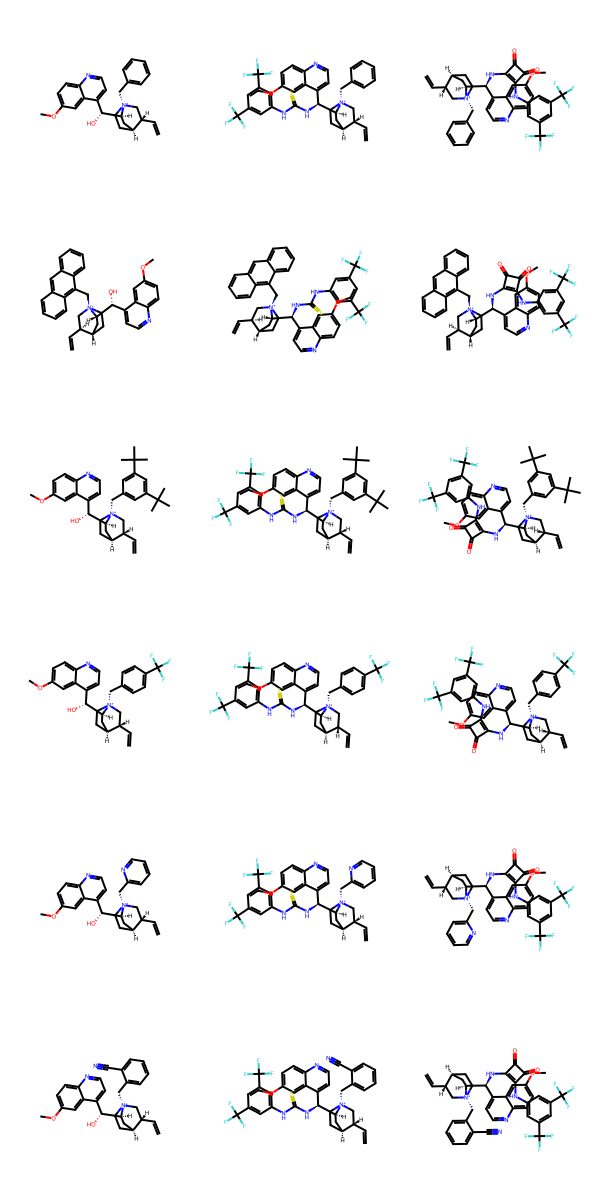

In [25]:
mol_list = []
n_mol = 0
for smiles in cat_list:
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    mol_list.append(mol)
    print(Chem.MolToSmiles(mol))
    n_mol += 1
img = Draw.MolsToGridImage(mol_list, molsPerRow=3)
img

In [26]:
# Of course, these manipulations and others can be done at the molecular-graph level... but thats for another day

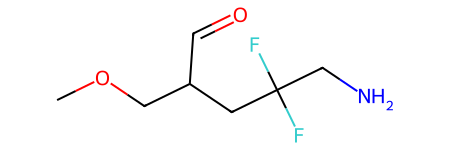


     RDKit          3D

 25 24  0  0  0  0  0  0  0  0999 V2000
   -3.2035    0.6700   -0.1319 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6480   -0.3362   -0.8158 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9220   -1.2958   -0.2563 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6458   -0.8478    0.4234 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9326    0.0776    1.5207 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5747    1.2070    1.7024 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.3343   -0.2914   -0.5581 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6100    0.0824    0.0682 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1156   -1.0856    0.6668 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.5939    1.1524    0.8808 F   0  0  0  0  0  0  0  0  0  0  0  0
    2.6878    0.4013   -0.9986 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8640    0.7455   -0.2173 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8938    0.3553    0.6995 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6213    1.5222    0

In [27]:
# Since rdkit molecules are graphs, we dont have coordinates for them. How do we do that?
# Enter the fantastic world of embeddings

mol = Chem.MolFromSmiles("COCC(C=O)CC(F)(F)CN")
display(mol)
molH = Chem.AddHs(mol)
params = AllChem.ETKDGv3() # This is one of many methods depending on parameters, mostly empirical choices
params.randomSeed = 0xf00d # optional random seed for reproducibility
AllChem.EmbedMolecule(molH, params)
print(Chem.MolToMolBlock(molH))

In [28]:
D = AllChem.Get3DDistanceMatrix(molH)
print(D)

[[0.         1.33743206 2.34999092 3.02560394 2.8704133  3.25018436
  3.69088091 4.85343703 5.65807656 4.92688017 5.96084849 7.06847878
  1.12548683 1.07950075 1.1676535  2.64828815 3.31130797 4.05008695
  3.10061286 3.22315047 4.27111086 6.42003272 5.72219615 7.97420116
  7.07569046]
 [1.33743206 0.         1.32702716 2.4095916  2.92798636 3.60847232
  2.99383201 4.36894415 5.04500472 4.80506772 5.38969885 6.62835189
  2.07990611 2.11065019 2.00295826 2.02190373 2.06421451 3.34114618
  3.31053877 2.71023383 3.27341531 5.64413233 5.25136061 7.45233321
  6.82759583]
 [2.34999092 1.32702716 0.         1.51369036 2.4542061  3.45189887
  2.48815224 3.80521747 4.14709871 4.43267074 4.9680512  6.13564142
  2.74369615 2.93673771 3.25912222 1.14440491 1.13227139 2.1545104
  2.77370459 2.74785386 2.66161358 5.10883678 5.10286707 6.9422064
  6.45995468]
 [3.02560394 2.4095916  1.51369036 0.         1.46388922 2.42140315
  1.49451275 2.46580552 2.78231215 3.03756149 3.83348749 4.82572956
  3.4746

In [29]:
# Lets see our molecule in 3D

view = py3Dmol.view()
view.removeAllModels()
view.setViewStyle({'style':'outline','color':'black','width':0.1})
view.addModel(Chem.MolToMolBlock(molH, confId=0), 'sdf')
ref_m = view.getModel()
ref_m.setStyle({},{'stick':{'colorscheme':'greyCarbon'}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [30]:
# Of course, its not always that easy.

In [31]:
def genConf(m, nc=10, atomIds=[0]):
    nr = int(AllChem.CalcNumRotatableBonds(m))
    m = Chem.AddHs(m)
    Chem.AssignAtomChiralTagsFromStructure(m, replaceExistingTags=True)
    if nc == "X":
        if nr < 3:
            nc = 50
        else:
            nc = nr**3
    params = AllChem.ETKDGv3()
    ids = AllChem.EmbedMultipleConfs(m, nc, params)
    rmslist = []
    AllChem.AlignMolConformers(m, RMSlist=rmslist, atomIds=atomIds)
    energies = []
    for id in ids:		
        prop = AllChem.MMFFGetMoleculeProperties(m, mmffVariant="MMFF94s")
        ff = AllChem.MMFFGetMoleculeForceField(m, prop, confId=id)
        ff.Minimize()
        en = float(ff.CalcEnergy())
        energies.append(en)	
    return m, rmslist, energies

def visConf(m):
    view = py3Dmol.view()
    view.removeAllModels()
    view.setViewStyle({'style':'outline','color':'black','width':0.1})
    for idx, _ in enumerate(m.GetConformers()):
        view.addModel(Chem.MolToMolBlock(m, confId=idx), 'sdf')
        ref_m = view.getModel()
        ref_m.setStyle({},{'stick':{'colorscheme':'greyCarbon'}})
    view.zoomTo()
    view.show()

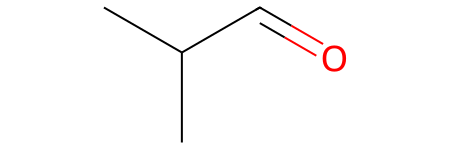

In [32]:
# Lets try with our more refined workflow
mol = Chem.MolFromSmiles("COCC(C=O)CC(F)(F)CN")
patt = Chem.MolFromSmiles('CC(C=O)C');patt


In [33]:
if mol.HasSubstructMatch(patt):
    idxs = mol.GetSubstructMatch(patt)

atomIds = list(idxs)

In [34]:
mol3d, rmslist, energies = genConf(mol, atomIds=atomIds)

print(energies, rmslist)
print(mol3d.GetNumConformers(),mol3d.GetConformer().Is3D())

[44.6954745430978, 51.43932350064783, 45.799225413992474, 47.76007443482193, 46.19442052443625, 46.030370082175665, 45.32878133136205, 49.41935496914995, 48.90992142382306, 46.37598096893932] [0.5257716691897504, 0.0806009243606103, 0.5136305259015236, 0.040889358905883806, 0.5374537398859683, 0.5908716624665886, 0.5617585245525502, 0.5322226942455939, 0.5510764037457261]
10 True


In [35]:
# Lets get the conformer with smaller energies
lowest_energy_idx = int(np.argmin(np.array(energies)))
print(lowest_energy_idx)
lowest_energy_mol = mol3d.GetConformer(lowest_energy_idx)

0


In [36]:

visConf(mol3d)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [37]:
def drawit(m,p,confId=-1):
    mb = Chem.MolToMolBlock(m,confId=confId)
    p.removeAllModels()
    p.addModel(mb,'sdf')
    p.setStyle({'stick':{}})
    p.setBackgroundColor('0xeeeeee')
    p.zoomTo()
    return p.show()



In [38]:
from ipywidgets import interact, interactive, fixed

# now construct the view and interactive widget:
p = py3Dmol.view(width=400,height=400)
interact(drawit, m=fixed(mol3d),p=fixed(p),confId=(0,mol3d.GetNumConformers()-1));

interactive(children=(IntSlider(value=0, description='confId', max=9), Output()), _dom_classes=('widget-intera…

In [39]:
# Finally, can we read xyz molecules as rdkit graphs?

def cleanup_xyz(fname):
    ind = open(fname).readlines()
    nAts = int(ind[0])
    ind[1] = '\n'
    ind = ind[:nAts+2]
    for i in range(2,nAts+2):
        l = ind[i]
        l = l.split('\t')
        ind[i] = '\t'.join(l)
    ind = ''.join(ind)
    print(ind)
    return ind

ind = cleanup_xyz("example.xyz")
raw_mol = Chem.MolFromXYZBlock(ind)
print(raw_mol.GetNumAtoms(),raw_mol.GetNumBonds())

14

C   2.142   1.395  -8.932  
C   3.631   1.416  -8.537  
C   4.203  -0.012  -8.612  
C   5.691   0.009  -8.218  
H   1.604   0.760  -8.260               
H   1.745   2.388  -8.880  
H   2.043   1.024  -9.930               
H   4.169   2.051  -9.210  
H   3.731   1.788  -7.539               
H   3.665  -0.647  -7.940  
H   4.104  -0.384  -9.610  
H   6.088  -0.983  -8.270  
H   5.791   0.381  -7.220  
H   6.230   0.644  -8.890  

14 0


In [40]:
def draw_with_spheres(mol):
    v = py3Dmol.view(width=300,height=300)
    IPythonConsole.addMolToView(mol,v)
    v.zoomTo()
    v.setStyle({'sphere':{'radius':0.3},'stick':{'radius':0.2}});
    v.show()


In [41]:
draw_with_spheres(raw_mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [42]:
conn_mol = Chem.Mol(raw_mol)
rdDetermineBonds.DetermineConnectivity(conn_mol,charge=0)
draw_with_spheres(conn_mol)
conn_mol_noh = Chem.RemoveHs(conn_mol)
smiles = Chem.MolToSmiles(conn_mol_noh,kekuleSmiles=True)
print(smiles)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

CCCC


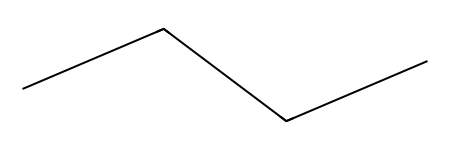

In [43]:
new_mol = Chem.MolFromSmiles(smiles)
display(new_mol)